In [1]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
march_20 = pd.read_csv("inmemoriam/march_2020.csv", index_col=0)
march_19 = pd.read_csv("inmemoriam/march_2019.csv", index_col=0)
march_18 = pd.read_csv("inmemoriam/march_2018.csv", index_col=0)
march_17 = pd.read_csv("inmemoriam/march_2017.csv", index_col=0)
march_16 = pd.read_csv("inmemoriam/march_2016.csv", index_col=0)

In [3]:
march = pd.concat([march_16, march_17, march_18, march_19, march_20])
march.reset_index(drop = True, inplace = True)

march["location"] = march["location"].str.strip().str.lower()

years = []

for date in march["date"]:
    year = dt.datetime.strptime(date, "%Y-%m-%d")
    year = dt.datetime.strftime(year, "%Y")
    years.append(year)

march["year"] = years  
march = march.dropna()

march.tail()

,name,age,date,location,month,week,day,year
6796,Francine CHARLIER,94.0,2020-03-31,rouvroy,March,13,91,2020
6797,Irène CALLEWAERT,93.0,2020-03-31,luingne,March,13,91,2020
6798,Lieven BYTTEBIER,95.0,2020-03-31,wevelgem,March,13,91,2020
6799,Liliane Barbier,78.0,2020-03-31,brugge,March,13,91,2020
6800,Rose-Marie ARLEPAIN,83.0,2020-03-31,templeuve,March,13,91,2020


Text(0, 0.5, 'age')

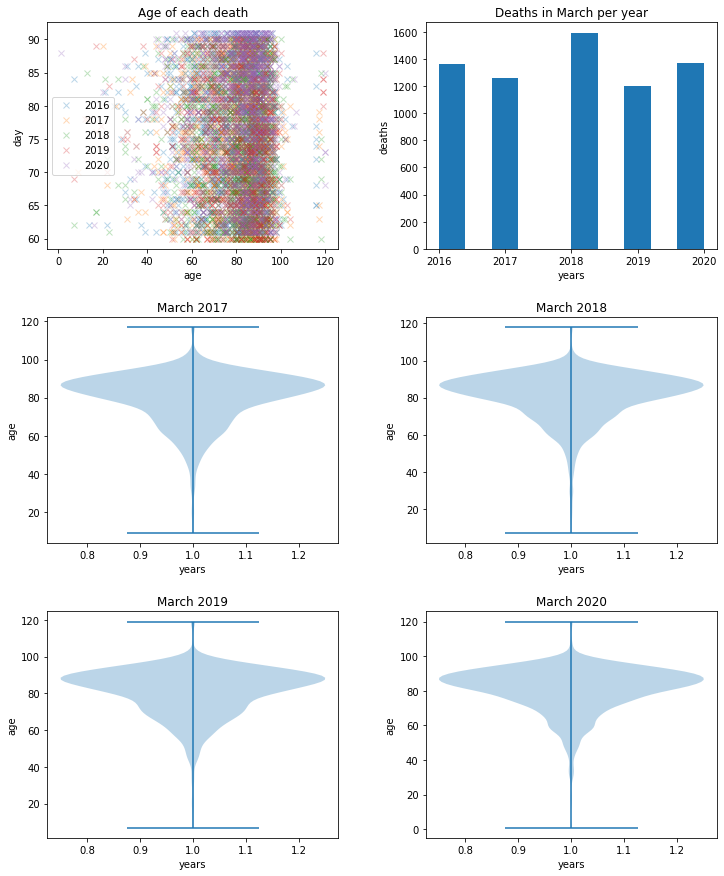

In [4]:
locations = []

for index, person in march.iterrows():
    location = person[3]
    if location == "-" or location == "":
        location = np.nan
    locations.append(location)

march["location"] = locations

groups = march.groupby("year")

fig, axs = plt.subplots(3, 2, figsize=(12,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
for name, group in groups:
    axs[0,0].plot(group["age"], group["day"], marker = 'x', linestyle = '', label = name, alpha = 0.3)
    axs[0,0].legend()
axs[0,0].title.set_text('Age of each death')
axs[0,0].set_xlabel('age')
axs[0,0].set_ylabel('day')
axs[0,1].hist(march["year"])
axs[1,0].title.set_text('Number of deaths for March')
axs[0,1].title.set_text('Deaths in March per year')
axs[0,1].set_xlabel('years')
axs[0,1].set_ylabel('deaths')
axs[1,0].violinplot(march[march["year"] == "2017"]["age"])
axs[1,0].title.set_text('March 2017')
axs[1,0].set_xlabel('years')
axs[1,0].set_ylabel('age')
axs[1,1].violinplot(march[march["year"] == "2018"]["age"])
axs[1,1].title.set_text('March 2018')
axs[1,1].set_xlabel('years')
axs[1,1].set_ylabel('age')
axs[2,0].violinplot(march[march["year"] == "2019"]["age"])
axs[2,0].title.set_text('March 2019')
axs[2,0].set_xlabel('years')
axs[2,0].set_ylabel('age')
axs[2,1].violinplot(march[march["year"] == "2020"]["age"])
axs[2,1].title.set_text('March 2020')
axs[2,1].set_xlabel('years')
axs[2,1].set_ylabel('age')

In [293]:
print("For 2016:")
print("---------")
print(march[march["year"] == "2016"]["location"].value_counts().head(3))
print("\n")
print("For 2017:")
print("---------")
print(march[march["year"] == "2017"]["location"].value_counts().head(3))
print("\n")
print("For 2018:")
print("---------")
print(march[march["year"] == "2018"]["location"].value_counts().head(3))
print("\n")
print("For 2019:")
print("---------")
print(march[march["year"] == "2019"]["location"].value_counts().head(3))
print("\n")
print("For 2020:")
print("---------")
print(march[march["year"] == "2020"]["location"].value_counts().head(3))

For 2016:
---------
hasselt         47
genk            33
sint-truiden    21
Name: location, dtype: int64


For 2017:
---------
genk       41
hasselt    33
tournai    21
Name: location, dtype: int64


For 2018:
---------
hasselt         67
genk            55
sint-truiden    27
Name: location, dtype: int64


For 2019:
---------
hasselt    43
genk       43
tournai    22
Name: location, dtype: int64


For 2020:
---------
hasselt         59
genk            45
sint-truiden    30
Name: location, dtype: int64
